# Model Training and and Evaluation
## In this notebook we will run our data througn different ML algorithms and evaluate their performance

### The evaluation criteria we will be using is f1_score , precision and AUC ROC scores. 
### Here Precision is quite important since it depends of True Positives and a higher value of Precision indiocates a low False Positive.
#### A less False Positive is important since in Bank Customer Churning problem. Wrongfully labeling a person to False Positive will impact the bank's reputation and can harass the customer. 


#### [Note: The CSV file being used here is build by Data_Explore_Manipulate.ipynb after data cleaning and manipulation]

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, precision_score, roc_auc_score


In [12]:
data = pd.read_csv('data_cleaned_churn.csv')

In [13]:
data

,Unnamed: 0,vintage,age,dependents,city,customer_nw_category,days_since_last_transaction,churn,current_balance,previous_month_end_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_cat,occupation_cat,branch_code_cat
0,0,3135,66,0.0,187.0,2,224.0,0,9.823292,9.823292,...,9.822769,9.740980,9.740980,9.740980,9.740980,9.823292,9.823292,1,3,676
1,1,310,35,0.0,1020.0,2,60.0,0,10.016386,10.154428,...,10.289410,9.741002,9.741002,10.020660,9.746866,10.064619,10.157649,1,3,2680
2,2,2356,31,0.0,146.0,2,31.0,0,9.948134,10.035186,...,9.894242,9.741005,9.741005,10.045279,9.756102,9.999083,10.001981,1,2,40
3,3,478,90,0.0,1020.0,2,147.0,1,9.867441,9.867441,...,9.798490,9.740996,9.740996,9.740996,9.859710,9.867441,9.834662,1,3,530
4,4,2531,42,2.0,1494.0,3,58.0,1,9.794103,9.820199,...,9.845388,9.740988,9.782145,9.775007,9.827581,9.806820,9.835057,1,3,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27882,28377,1845,10,0.0,1020.0,2,70.0,0,9.802364,9.802364,...,9.892816,9.740986,9.740986,9.740986,9.740986,9.802364,9.802364,0,4,1006
27883,28378,4919,34,0.0,1046.0,2,14.0,0,9.944826,9.955568,...,9.945855,9.741069,9.741103,9.792612,9.798908,9.939749,9.937421,0,3,205
27884,28379,297,47,0.0,1096.0,2,0.0,1,11.320699,11.264689,...,10.569413,9.983538,9.946694,9.750816,9.745183,11.265470,11.219416,1,2,536
27885,28380,2585,50,3.0,1219.0,3,31.0,0,9.832290,9.832290,...,9.844662,9.740980,9.740980,9.740980,9.740980,9.832290,9.832290,1,3,252


In [14]:
data.drop(labels='Unnamed: 0', axis=1,inplace=True)

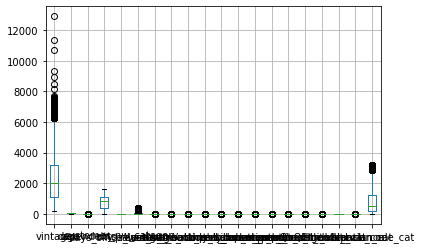

In [15]:
data.boxplot()

In [16]:
Y = data['churn']
Y

0        0
1        0
2        0
3        1
4        1
        ..
27882    0
27883    0
27884    1
27885    0
27886    1
Name: churn, Length: 27887, dtype: int64

In [17]:
X = data.drop(labels='churn', axis=1, inplace=False)
X

,vintage,age,dependents,city,customer_nw_category,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_cat,occupation_cat,branch_code_cat
0,3135,66,0.0,187.0,2,224.0,9.823292,9.823292,9.823292,9.822769,9.740980,9.740980,9.740980,9.740980,9.823292,9.823292,1,3,676
1,310,35,0.0,1020.0,2,60.0,10.016386,10.154428,10.118569,10.289410,9.741002,9.741002,10.020660,9.746866,10.064619,10.157649,1,3,2680
2,2356,31,0.0,146.0,2,31.0,9.948134,10.035186,9.994706,9.894242,9.741005,9.741005,10.045279,9.756102,9.999083,10.001981,1,2,40
3,478,90,0.0,1020.0,2,147.0,9.867441,9.867441,9.856634,9.798490,9.740996,9.740996,9.740996,9.859710,9.867441,9.834662,1,3,530
4,2531,42,2.0,1494.0,3,58.0,9.794103,9.820199,9.833243,9.845388,9.740988,9.782145,9.775007,9.827581,9.806820,9.835057,1,3,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27882,1845,10,0.0,1020.0,2,70.0,9.802364,9.802364,9.866937,9.892816,9.740986,9.740986,9.740986,9.740986,9.802364,9.802364,0,4,1006
27883,4919,34,0.0,1046.0,2,14.0,9.944826,9.955568,9.936382,9.945855,9.741069,9.741103,9.792612,9.798908,9.939749,9.937421,0,3,205
27884,297,47,0.0,1096.0,2,0.0,11.320699,11.264689,11.162585,10.569413,9.983538,9.946694,9.750816,9.745183,11.265470,11.219416,1,2,536
27885,2585,50,3.0,1219.0,3,31.0,9.832290,9.832290,9.835380,9.844662,9.740980,9.740980,9.740980,9.740980,9.832290,9.832290,1,3,252


In [18]:
minMax = MinMaxScaler()
X_scaled = minMax.fit_transform(X)

In [19]:
X_train = pd.DataFrame(X_scaled, columns=X.columns)
X_train

,vintage,age,dependents,city,customer_nw_category,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,gender_cat,occupation_cat,branch_code_cat
0,0.232330,0.730337,0.000000,0.113402,0.5,0.613699,0.042723,0.042721,0.000882,0.042471,0.000006,0.000006,0.000006,0.000006,0.042721,0.042721,1.0,0.75,0.212645
1,0.010221,0.382022,0.000000,0.618557,0.5,0.164384,0.142933,0.214571,0.160819,0.284760,0.000017,0.000017,0.145925,0.003072,0.167963,0.216243,1.0,0.75,0.843032
2,0.171083,0.337079,0.000000,0.088539,0.5,0.084932,0.107512,0.152688,0.093729,0.079581,0.000018,0.000018,0.158769,0.007882,0.133952,0.135456,1.0,0.50,0.012583
3,0.023430,1.000000,0.000000,0.618557,0.5,0.402740,0.065635,0.065634,0.018942,0.029865,0.000014,0.000014,0.000014,0.061844,0.065634,0.048622,1.0,0.75,0.166719
4,0.184842,0.460674,0.222222,0.906004,1.0,0.158904,0.027575,0.041117,0.006272,0.054215,0.000010,0.021447,0.017759,0.045111,0.034173,0.048827,1.0,0.75,0.114501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27882,0.130907,0.101124,0.000000,0.618557,0.5,0.191781,0.031862,0.031861,0.024522,0.078840,0.000009,0.000009,0.000009,0.000009,0.031861,0.031861,0.0,1.00,0.316452
27883,0.372592,0.370787,0.000000,0.634324,0.5,0.038356,0.105796,0.111369,0.062137,0.106379,0.000052,0.000070,0.026944,0.030177,0.103159,0.101951,0.0,0.75,0.064486
27884,0.009199,0.516854,0.000000,0.664645,0.5,0.000000,0.819831,0.790764,0.726313,0.430143,0.126557,0.107155,0.005137,0.002195,0.791169,0.767268,1.0,0.50,0.168606
27885,0.189087,0.550562,0.333333,0.739236,1.0,0.084932,0.047392,0.047391,0.007429,0.053838,0.000006,0.000006,0.000006,0.000006,0.047391,0.047391,1.0,0.75,0.079270


In [20]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y, random_state=52, stratify=Y,)

# F1_score and Precison Score Calculator

In [21]:
def model_f1_cal(model, train_x, train_y, test_x, test_y):
    
    my_pred = model.predict(train_x)
    train_score = f1_score(my_pred, train_y)
    
    
    my_pred_test = model.predict(test_x)
    test_score = f1_score(my_pred_test, test_y)
    
    return train_score, test_score

In [22]:
def model_precison_cal(model,train_x, train_y,test_x, test_y):
    pred = model.predict_proba(train_x)[:,1]
    pred_val = model.predict(train_x)
    precison_train = precision_score(train_y, pred_val)
    
    
    pred = model.predict_proba(test_x)[:,1]
    pred_val = model.predict(test_x)
    precison_test = precision_score(test_y, pred_val)
    
    return  precison_train, precison_test

# Logistic Regression

In [23]:
def logisticRegModel(train_x, train_y, test_x,test_y):
    log = LogisticRegression()
    log.fit(train_x, train_y)

    f1_train, f1_test = model_f1_cal(log,train_x,train_y,test_x, test_y)
    precision_train, precision_test = model_precison_cal(log,train_x,train_y,test_x, test_y)
    
    return [f1_train, f1_test,precision_train, precision_test]

logisticRegModel(train_x, train_y,test_x, test_y)


[0.3306288032454361, 0.3090234857849196, 0.718694885361552, 0.7102272727272727]

# Decision Tree

In [24]:
def decisionTreeModel(train_x,train_y,test_x, test_y,max_depth):
    decision = DecisionTreeClassifier (max_depth=max_depth)
    decision.fit(train_x, train_y)

    f1_train, f1_test = model_f1_cal(decision,train_x,train_y,test_x, test_y)
    precision_train, precision_test = model_precison_cal(decision,train_x,train_y,test_x, test_y)
    
    return [f1_train, f1_test,precision_train, precision_test]


decisionTreeModel(train_x,train_y,test_x, test_y,10)



[0.7087761919222593,
 0.5203847915712323,
 0.8365591397849462,
 0.6194111232279171]

# KNN model

In [25]:
def knnModel(train_x,train_y,test_x, test_y,n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_x, train_y)
    f1_train, f1_test = model_f1_cal(knn,train_x,train_y,test_x, test_y)
    precision_train, precision_test = model_precison_cal(knn,train_x,train_y,test_x, test_y)
    
    return [f1_train, f1_test,precision_train, precision_test]

# Random Forest

In [26]:
def randomForestModel(train_x,train_y,test_x, test_y,max_depth):
    random = RandomForestClassifier(n_estimators=100, max_depth=max_depth)
    random.fit(train_x, train_y)
    f1_train, f1_test = model_f1_cal(random,train_x,train_y,test_x, test_y)
    precision_train, precision_test = model_precison_cal(random,train_x,train_y,test_x, test_y)
    
    return [f1_train, f1_test,precision_train, precision_test]


randomForestModel(train_x,train_y,test_x, test_y,10)

[0.663163248008137, 0.5082135523613962, 0.9300998573466477, 0.7258064516129032]

# Hyperparameter Tuning

In [27]:

dlist = []
klist = []
rlist = []
for i in range(4,20,1):
    print(i)
    l1 = decisionTreeModel(train_x,train_y,test_x, test_y,i)
    l1.append(i)
    dlist.append(l1)
    
    l2 = knnModel(train_x,train_y,test_x, test_y,i)
    l2.append(i)
    klist.append(l2)
    
    l3 = randomForestModel(train_x,train_y,test_x, test_y,i)
    l3.append(i)
    rlist.append(l3)
    
    print('Decision: ',l1)
    print('Knn: ',l2)
    print('random: ',l3)


    


4
Decision:  [0.5237785016286645, 0.4890190336749634, 0.6860068259385665, 0.6398467432950191, 4]
Knn:  [0.2774207844006204, 0.11173974540311173, 0.8730822873082287, 0.5337837837837838, 4]
random:  [0.4342727444675619, 0.4304080491894913, 0.7699530516431925, 0.7361376673040153, 4]
5
Decision:  [0.53215679619888, 0.48571428571428565, 0.7477348593228421, 0.6858789625360231, 5]
Knn:  [0.36658556366585565, 0.17780661907852044, 0.795774647887324, 0.49818181818181817, 5]
random:  [0.47179864045563114, 0.4579489962018448, 0.7795992714025501, 0.7313691507798961, 5]
6
Decision:  [0.5793363736436546, 0.5245746691871456, 0.7186890362856028, 0.6529411764705882, 6]
Knn:  [0.22399635036496351, 0.10706638115631693, 0.8350340136054422, 0.5555555555555556, 6]
random:  [0.5061063218390804, 0.4710920770877944, 0.7951467268623025, 0.7308970099667774, 6]
7
Decision:  [0.5993932620150088, 0.5155131264916468, 0.7608431293068504, 0.6513872135102533, 7]
Knn:  [0.28577586206896555, 0.15405224380442065, 0.7855450

In [28]:
col = ['f1_train', 'f1_test','precision_train', 'precision_test','k']
decisionList = pd.DataFrame(data= dlist,columns=col)
knnList = pd.DataFrame(data=klist, columns=col)
randomList = pd.DataFrame(data= rlist, columns=col)
    

In [29]:
error = decisionList['precision_test']
decisionList['error'] = 1-error
decisionList

,f1_train,f1_test,precision_train,precision_test,k,error
0,0.523779,0.489019,0.686007,0.639847,4,0.360153
1,0.532157,0.485714,0.747735,0.685879,5,0.314121
2,0.579336,0.524575,0.718689,0.652941,6,0.347059
3,0.599393,0.515513,0.760843,0.651387,7,0.348613
4,0.643228,0.536026,0.766205,0.639650,8,0.360350
5,0.663310,0.515066,0.823438,0.637529,9,0.362471
6,0.708865,0.520073,0.836318,0.615551,10,0.384449
7,0.741235,0.507980,0.874329,0.600863,11,0.399137
8,0.775634,0.494968,0.916039,0.588043,12,0.411957
9,0.804664,0.489274,0.946225,0.579459,13,0.420541


## Plotting Elbow curve to find out the best value of hyperparameter for each model

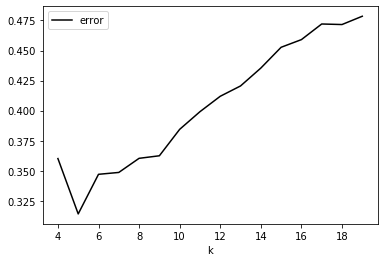

In [30]:
ax = plt.gca()
#decisionList.plot(ax = ax,kind = 'line',x='k', y='f1_train',color='red')
#decisionList.plot(ax = ax,kind = 'line',x='k', y='f1_test')
#decisionList.plot(ax = ax,kind = 'line',x='k', y='precision_train',color='green')
#decisionList.plot(ax = ax,kind = 'line',x='k', y='precision_test',color='orange')
decisionList.plot(ax = ax,kind = 'line',x='k', y='error',color='black')
plt.show()

In [31]:
error = knnList['precision_test']
knnList['error'] = 1-error
knnList

,f1_train,f1_test,precision_train,precision_test,k,error
0,0.277421,0.111740,0.873082,0.533784,4,0.466216
1,0.366586,0.177807,0.795775,0.498182,5,0.501818
2,0.223996,0.107066,0.835034,0.555556,6,0.444444
3,0.285776,0.154052,0.785545,0.506608,7,0.493392
4,0.194645,0.105415,0.837675,0.613445,8,0.386555
5,0.241641,0.136490,0.785507,0.576471,9,0.423529
6,0.154580,0.094477,0.818182,0.590909,10,0.409091
7,0.193757,0.128440,0.792060,0.602649,11,0.397351
8,0.140005,0.087977,0.806094,0.612245,12,0.387755
9,0.171093,0.117479,0.793028,0.630769,13,0.369231


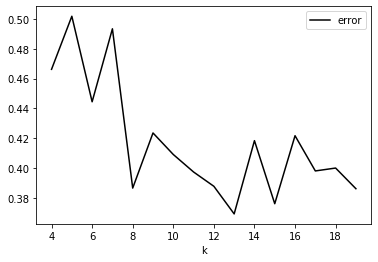

In [32]:
ax = plt.gca()
#knnList.plot(ax = ax,kind = 'line',x='k', y='f1_train',color='red')
#knnList.plot(ax = ax,kind = 'line',x='k', y='f1_test')
#knnList.plot(ax = ax,kind = 'line',x='k', y='precision_train',color='green')
#knnList.plot(ax = ax,kind = 'line',x='k', y='precision_test',color='orange')
knnList.plot(ax = ax,kind = 'line',x='k', y='error',color='black')

plt.show()

In [33]:
error = randomList['precision_test']
randomList['error'] = 1-error
randomList

,f1_train,f1_test,precision_train,precision_test,k,error
0,0.434273,0.430408,0.769953,0.736138,4,0.263862
1,0.471799,0.457949,0.779599,0.731369,5,0.268631
2,0.506106,0.471092,0.795147,0.730897,6,0.269103
3,0.528510,0.481698,0.816630,0.733441,7,0.266559
4,0.576348,0.503634,0.848004,0.734848,8,0.265152
5,0.616601,0.508492,0.886802,0.729690,9,0.270310
6,0.667005,0.519878,0.929816,0.732759,10,0.267241
7,0.714712,0.530920,0.962946,0.730290,11,0.269710
8,0.751015,0.531266,0.979246,0.724420,12,0.275580
9,0.787686,0.539415,0.990423,0.724368,13,0.275632


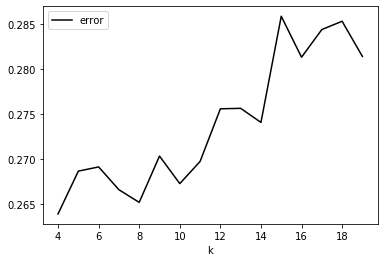

In [34]:
ax = plt.gca()
#randomList.plot(ax = ax,kind = 'line',x='k', y='f1_train',color='red')
#randomList.plot(ax = ax,kind = 'line',x='k', y='f1_test')
#randomList.plot(ax = ax,kind = 'line',x='k', y='precision_train',color='green')
#randomList.plot(ax = ax,kind = 'line',x='k', y='precision_test',color='orange')
randomList.plot(ax = ax,kind = 'line',x='k', y='error',color='black')
plt.show()

# Stratified K Fold Classifier

In [35]:
def StratifiedKFoldClass(model, rstate, num_splits):
    rocAucScore = []
    precisionScore = []
    skf = StratifiedKFold(n_splits = num_splits, random_state= rstate, shuffle=True)
    for index_train, index_test in skf.split(X_train, Y):
        
        x_train = X_train.iloc[index_train]
        x_test = X_train.iloc[index_test]
        y_train = Y.iloc[index_train]
        y_test = Y.iloc[index_test]
        
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        precisionScore.append(precision_score(y_test,pred))
        rocAucScore.append(roc_auc_score(y_test,pred))
        
        
    return precisionScore, rocAucScore
        
    

In [37]:
Log_pre , Log_roc = StratifiedKFoldClass(LogisticRegression(),rstate=10, num_splits=10)

/home/suranjan/miniconda3/envs/MLenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/suranjan/miniconda3/envs/MLenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

In [38]:
Rand_pre,Rand_roc = StratifiedKFoldClass(RandomForestClassifier(n_estimators=100, max_depth=8),rstate=12, num_splits=10)

In [39]:
KNN_pre , Knn_roc= StratifiedKFoldClass(KNeighborsClassifier(n_neighbors=13),rstate=12, num_splits=10)

In [40]:
Decision_pre, Decision_roc = StratifiedKFoldClass(DecisionTreeClassifier (max_depth=5),rstate=12, num_splits=10)

In [41]:
precisiondf = pd.DataFrame(columns=['LogisticReg','KNN','DecisionTree','RandomForest'])
precisiondf.LogisticReg = Log_pre
precisiondf.KNN = KNN_pre
precisiondf.DecisionTree = Decision_pre
precisiondf.RandomForest = Rand_pre

In [42]:
precisiondf

,LogisticReg,KNN,DecisionTree,RandomForest
0,0.713333,0.625000,0.665480,0.717054
1,0.727848,0.679245,0.687285,0.721190
2,0.717105,0.612903,0.728261,0.746269
3,0.734940,0.625000,0.690476,0.723140
4,0.625000,0.693878,0.771429,0.753906
5,0.680723,0.593750,0.714777,0.746479
6,0.689873,0.581818,0.673653,0.751938
7,0.751773,0.725490,0.733564,0.774704
8,0.761589,0.659574,0.689922,0.735178
9,0.674242,0.563636,0.726236,0.756303


In [45]:
# Mean Precision for Logistic Regression Classifier
precisiondf.LogisticReg.mean()

0.7076427643942304

In [46]:
# Mean Precision for KNN Classifier
precisiondf.KNN.mean()

0.6360295269463812

In [47]:
# Mean Precision for Decision Tree Classifier
precisiondf.DecisionTree.mean()

0.7081082844702977

In [48]:
# Mean Precision for Random Forest Classifier
precisiondf.RandomForest.mean()

0.7426160058897011

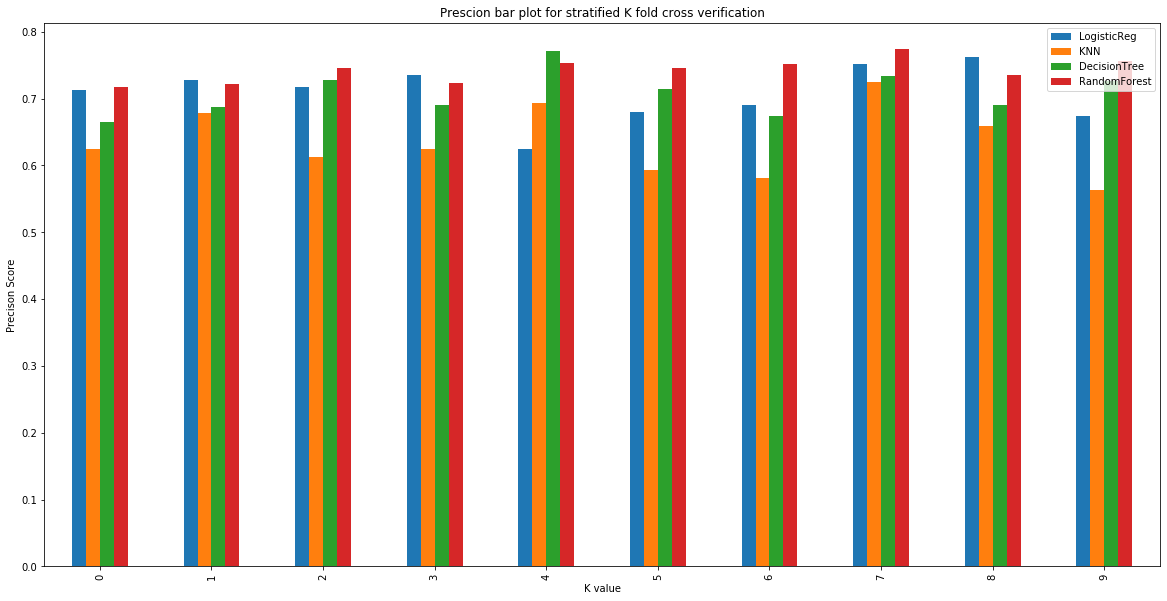

In [43]:
ax = plt.gca()
plt.title('Prescion bar plot for stratified K fold cross verification')
plt.xlabel('K value')
plt.ylabel('Precison Score')
precisiondf.plot(ax = ax,kind='bar',figsize=(20,10))
plt.show()


### It can be seen that the Random Forest model and Logistic Regression model works best provided the given dataset.

### The Mean scores for all the model suggests that Random Forest performed the best for this dataset. With a precision of 74.26 %